<a href="https://colab.research.google.com/github/zenca/Forecasting/blob/main/PracticaForecasting_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd

In [ ]:
datos1 = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])#Convertis en date ojo
datos1.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [ ]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    204 non-null    datetime64[ns]
 1   value   204 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.3 KB


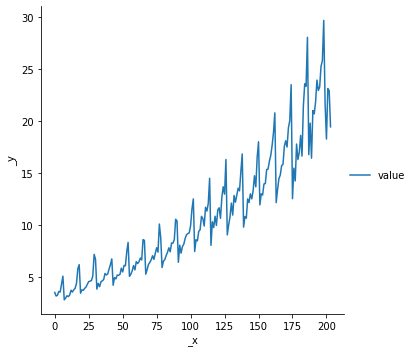

In [ ]:
sb.relplot(data=datos1, kind='line')

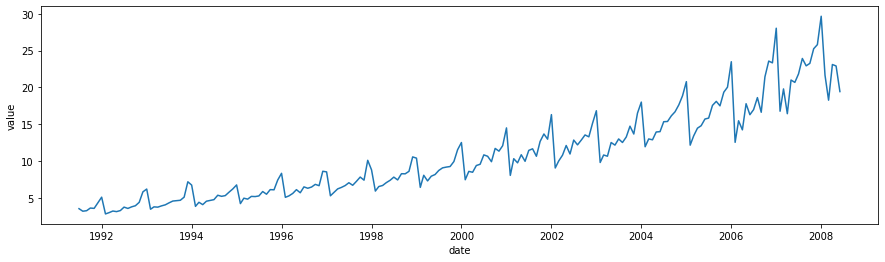

In [ ]:
fig,axe=plt.subplots(figsize=(15,4))
sb.lineplot(y=datos1.value,x=datos1['date'], ax=axe)


In [ ]:
#Grafico por mes
datos1['year'] = [d.year for d in datos1.date]
datos1['month'] = [d.strftime('%b') for d in datos1.date]
years = datos1['year'].unique()
datos1.head()

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov


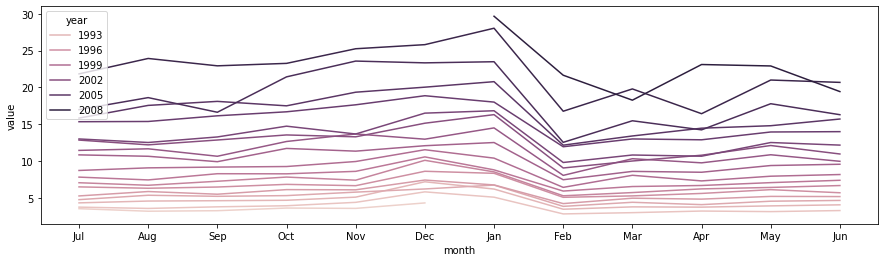

In [ ]:
#Seasonal 
fig,axe=plt.subplots(figsize=(15,4))
sb.lineplot(y=datos1.value,x=datos1['month'],hue=datos1['year'], ax=axe)

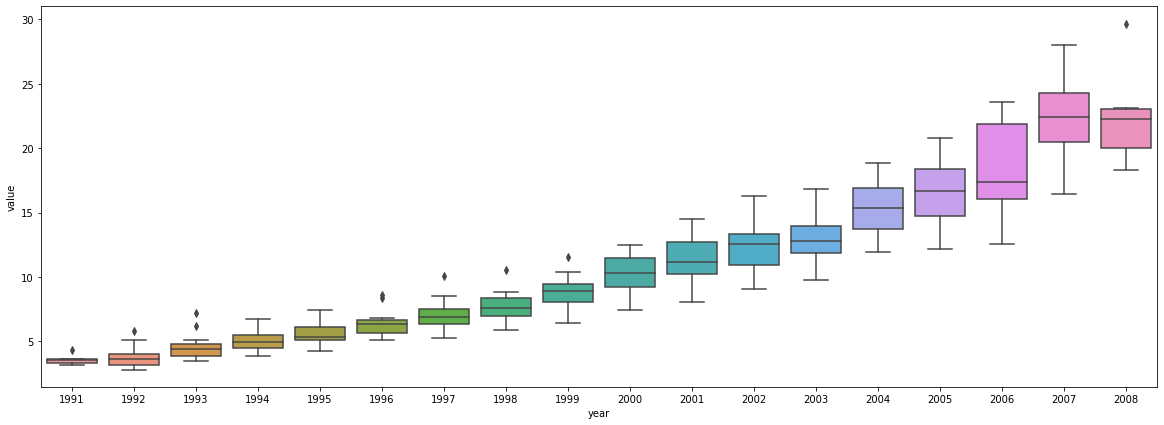

In [ ]:
fig, axe = plt.subplots(figsize=(20,7))
sb.boxplot(x='year', y='value', data=datos1, ax=axe)#muestra trend

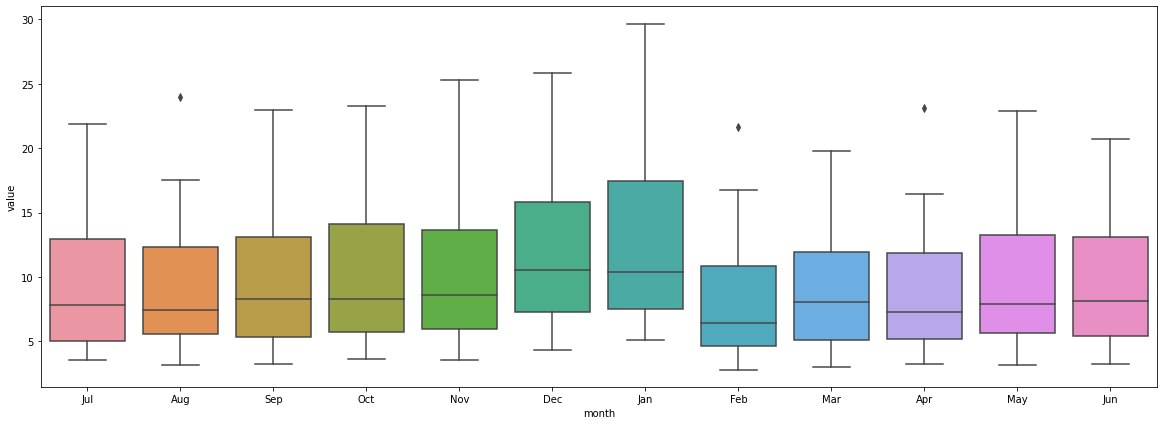

In [ ]:
fig, axes = plt.subplots(figsize=(20,7))
sb.boxplot(x='month', y='value', data=datos1.loc[~datos1.year.isin([2000, 2006]), :])#Me muestra seasonality Dec Jan

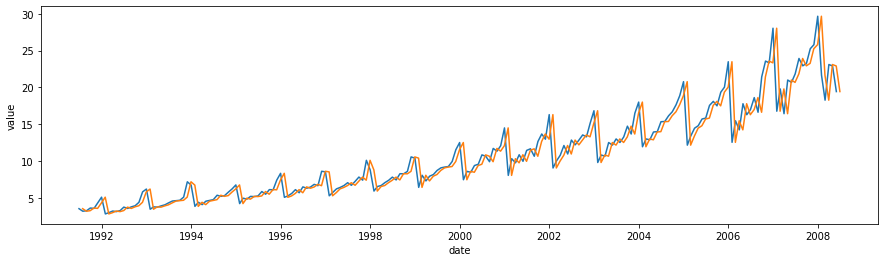

In [ ]:
#El resample solo funciona si uso el date como index pero no tengo ganas de cambiarlo.
datos2=datos1.set_index('date')
fig,axe=plt.subplots(figsize=(15,4))
sb.lineplot(y=datos1['value'],x=datos1['date'], ax=axe)
axe.plot(datos2['value'].resample('M').mean())


In [ ]:
#Descompongo en sus componentes
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(datos2['value'], model='multiplicative')
result_sum = seasonal_decompose(datos2['value'], model='additive', extrapolate_trend='freq')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


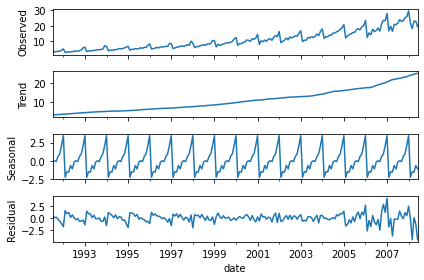

In [ ]:
result_sum.plot()
plt.show()

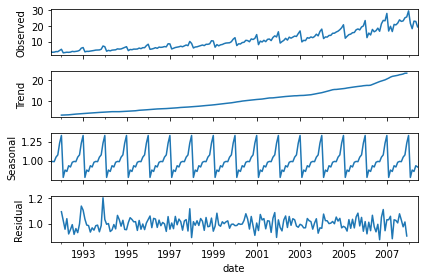

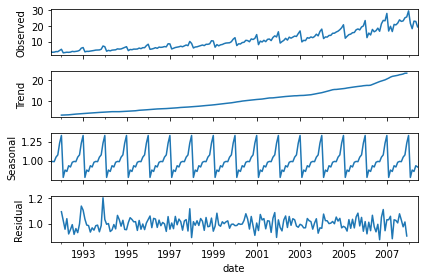

In [ ]:
result_mul.plot()

In [ ]:
datos2.head()

,value,year,month
date,,,
1991-07-01,3.526591,1991,Jul
1991-08-01,3.180891,1991,Aug
1991-09-01,3.252221,1991,Sep
1991-10-01,3.611003,1991,Oct
1991-11-01,3.565869,1991,Nov


In [ ]:
a=datos2['1991-07-01':'1991-09-01'].resample('W').sum()
a

,value,year
date,,
1991-07-07,3.526591,1991
1991-07-14,0.000000,0
1991-07-21,0.000000,0
1991-07-28,0.000000,0
1991-08-04,3.180891,1991
1991-08-11,0.000000,0
1991-08-18,0.000000,0
1991-08-25,0.000000,0
1991-09-01,3.252221,1991


In [ ]:
cuadro_comp=pd.concat([result_sum.trend,result_sum.seasonal,result_sum.resid,result_sum.observed], axis=1)
cuadro_comp.columns=['Trend','Seasonal','Resid','Observed']
cuadro_comp.head()

,Trend,Seasonal,Resid,Observed
date,,,,
1991-07-01,3.060085,-0.140765,0.607271,3.526591
1991-08-01,3.124765,0.027747,0.028379,3.180891
1991-09-01,3.189445,-0.090361,0.153137,3.252221
1991-10-01,3.254125,0.602876,-0.245998,3.611003
1991-11-01,3.318805,0.970698,-0.723634,3.565869


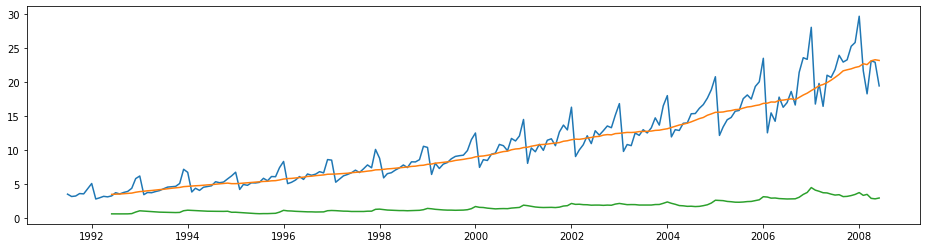

In [ ]:
#Stationarity? Con Rolling Statistics en Pandas
rol_mean = datos2['value'].rolling(window=12).mean() 
rol_std = datos2['value'].rolling(window=12).std()
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(datos2['value'])
ax.plot(rol_mean)
ax.plot(rol_std)
#la mean cambia las std no tanto

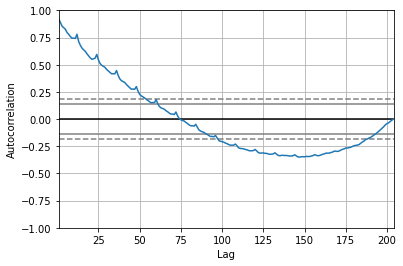

In [ ]:
# Hago autocorrelation Con Pandas ojo hay que importarlo
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(datos2['value'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


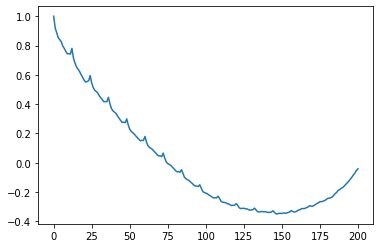

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datos2['value'], nlags=200)
plt.plot(lag_acf)

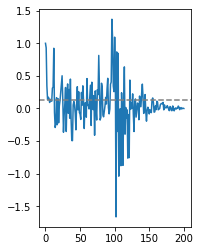

In [ ]:
lag_pacf = pacf(datos2['value'], nlags=200, method='ols')
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=1.96/np.sqrt(len(datos2['value'])),linestyle='--',color='gray')

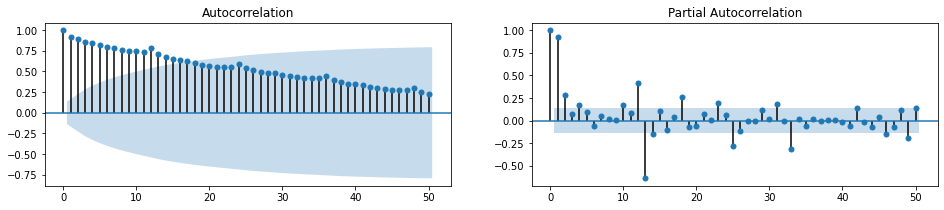

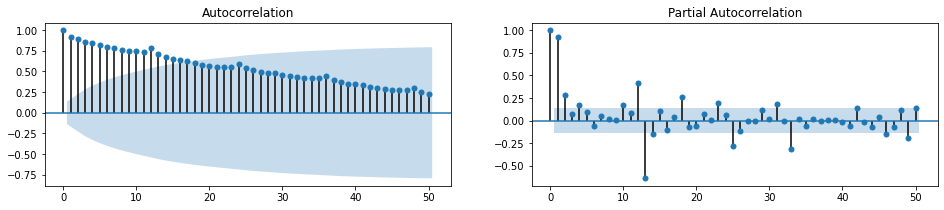

In [ ]:
#Con Stats model ojo otras aucorrelation
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(datos2['value'], lags=50, ax=axes[0])
plot_pacf(datos2['value'], lags=50, ax=axes[1])

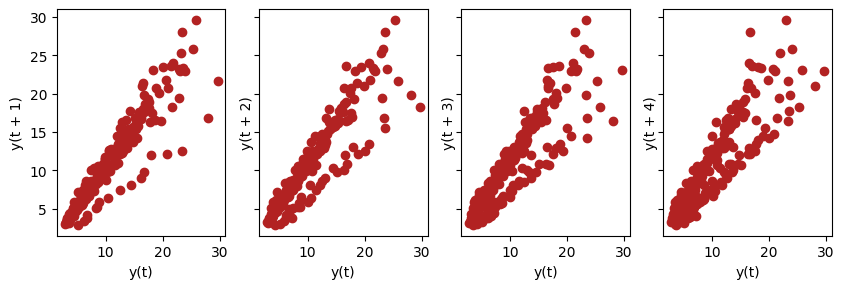

In [ ]:
#Los lag con Pandas
from pandas.plotting import lag_plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(datos2['value'], lag=i+1, ax=ax, c='firebrick')
    


# Uso de la Entropy

In [ ]:
# Con la Entropy ves que tanto se puede forecast 
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))
print(ApEn(datos2['value'], m=2, r=0.2*np.std(datos2['value'])))    #Intermedia

0.5374775224973489


In [ ]:
# Veo stationarity con ADFuller
from statsmodels.tsa.stattools import adfuller
result = adfuller(datos2['value'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADF Statistic: 3.145185689306741
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [ ]:
#El p-value da 1 no se rechaza la hip nula no es estacionaria

In [ ]:
#Pruebo con KPSS otro metodo para probar stationarity
from statsmodels.tsa.stattools import kpss
result = kpss(datos2['value'], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
#Esta es contrario la hip nula asi que tampoco es stationarity p-value 001

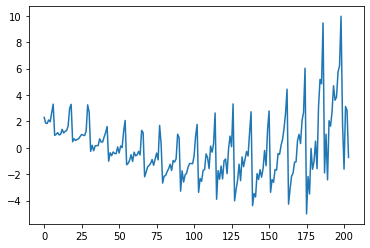

In [ ]:
#Voy a intentar stationarity con detrend
from scipy import signal
detrended = signal.detrend(datos2['value'])
plt.plot(detrended)

In [ ]:
#Veo como stationalizó
result = adfuller(detrended, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')#sigue sin ser tan statonarity

ADF Statistic: -0.5172291458071054
p-value: 0.8886102659629072
Critial Values:
   1%, -3.4654311561944873
Critial Values:
   5%, -2.8769570530458792
Critial Values:
   10%, -2.574988319755886


date
1991-07-01   NaN
1991-08-01   NaN
1991-09-01   NaN
1991-10-01   NaN
1991-11-01   NaN
Name: value, dtype: float64

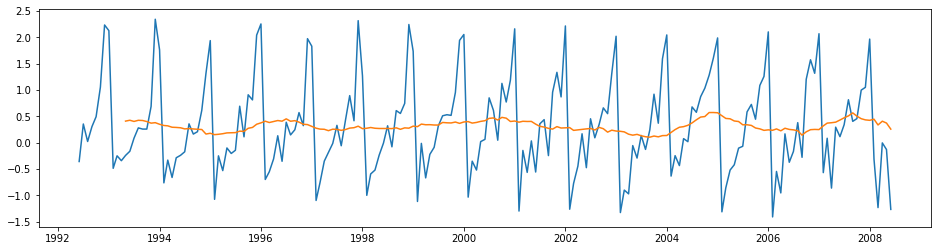

In [ ]:
#Pruebo tratando de transformar  es un detrendid a mano.Rolling statistics
y_detrend =  (datos2['value'] - datos2['value'].rolling(window=12).mean())/datos2['value'].rolling(window=12).std()
rol_mean = y_detrend['1992-06-01':].rolling(window=12).mean() 
rol_std = y_detrend['1992-06-01':].rolling(window=12).std()
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(y_detrend)
ax.plot(rol_mean)
#ax.plot(rol_std)
y_detrend.head()#Este anduvo bien 


In [ ]:
y_detrend.head(14)

date
1991-07-01         NaN
1991-08-01         NaN
1991-09-01         NaN
1991-10-01         NaN
1991-11-01         NaN
1991-12-01         NaN
1992-01-01         NaN
1992-02-01         NaN
1992-03-01         NaN
1992-04-01         NaN
1992-05-01         NaN
1992-06-01   -0.355578
1992-07-01    0.356041
1992-08-01    0.024212
Name: value, dtype: float64

In [ ]:
result = adfuller(y_detrend['1992-06-01':], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')#Súper bien muy negativo el adf y p-value 002 la null no es cierta 1% > adf sts y 5 y 10 también 

ADF Statistic: -3.8925353920915766
p-value: 0.0020904744963901223
Critial Values:
   1%, -3.467631519151906
Critial Values:
   5%, -2.8779183721695567
Critial Values:
   10%, -2.575501353364474


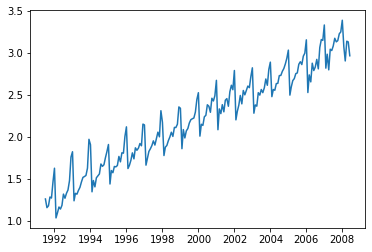

In [ ]:
#Con logaritmo
ts_log = np.log(datos2['value'])
plt.plot(ts_log)#Es peor

In [ ]:
def test_stationarity(timeseries, title):
    
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(16, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

In [ ]:
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

 > Is the de-trended data stationary ?
Test statistic = -3.893
P-value = 0.002
Critical values :
	1%: -3.467631519151906 - The data is  stationary with 99% confidence
	5%: -2.8779183721695567 - The data is  stationary with 95% confidence
	10%: -2.575501353364474 - The data is  stationary with 90% confidence


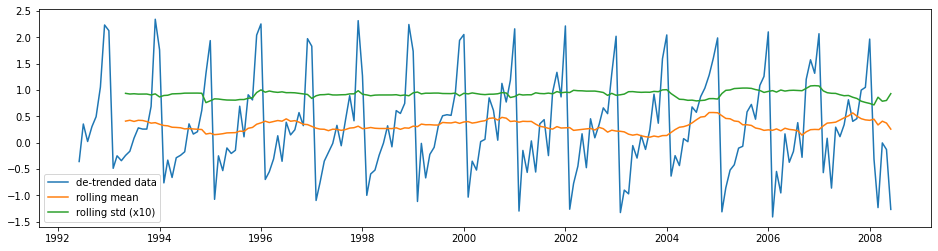

In [ ]:
test_stationarity(y_detrend,'de-trended data')
ADF_test(y_detrend,'de-trended data')

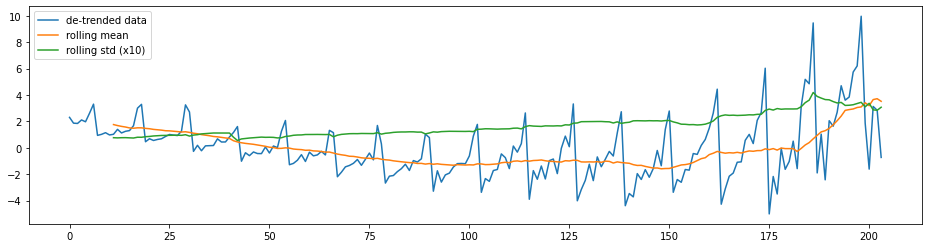

In [ ]:
test_stationarity(detrended,'de-trended data')
#ADF_test(detrended,'de-trended data')


 > Is the de-trended data stationary ?
Test statistic = -0.989
P-value = 0.757
Critical values :
	1%: -3.4654311561944873 - The data is not stationary with 99% confidence
	5%: -2.8769570530458792 - The data is not stationary with 95% confidence
	10%: -2.574988319755886 - The data is not stationary with 90% confidence


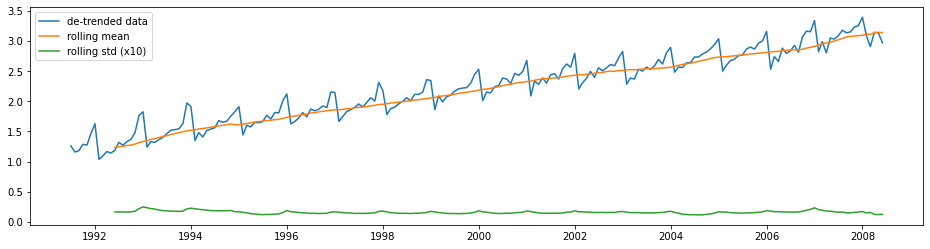

In [ ]:
test_stationarity(ts_log,'de-trended data')
ADF_test(ts_log,'de-trended data')

In [ ]:
#Stationary con -diference
y_12lag =  datos2['value'] - datos2['value'].shift(12)

 > Is the de-trended data stationary ?
Test statistic = -2.093
P-value = 0.247
Critical values :
	1%: -3.467631519151906 - The data is not stationary with 99% confidence
	5%: -2.8779183721695567 - The data is not stationary with 95% confidence
	10%: -2.575501353364474 - The data is not stationary with 90% confidence


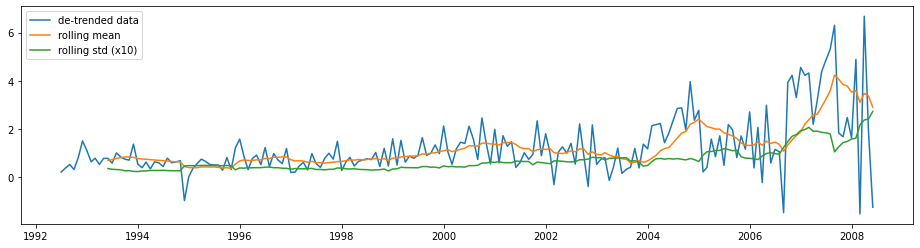

In [ ]:
test_stationarity(y_12lag,'de-trended data')
ADF_test(y_12lag,'de-trended data')

In [ ]:
y_12lag_detrend =  y_detrend - y_detrend.shift(12)

 > Is the de-trended data stationary ?
Test statistic = -6.226
P-value = 0.000
Critical values :
	1%: -3.469648263987657 - The data is  stationary with 99% confidence
	5%: -2.878798906308495 - The data is  stationary with 95% confidence
	10%: -2.5759713094779593 - The data is  stationary with 90% confidence


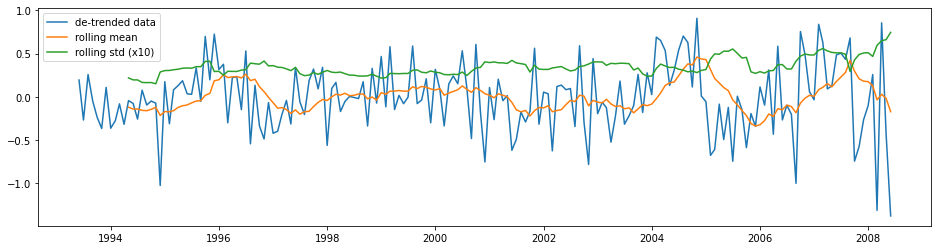

In [ ]:
test_stationarity(y_12lag_detrend,'de-trended data')
ADF_test(y_12lag_detrend,'de-trended data')#Es el mejor Voy a usar este para el estudio del forecast

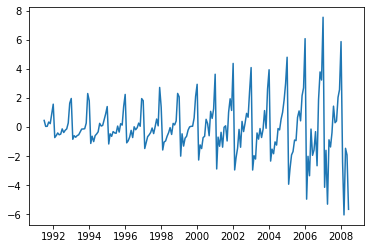

In [ ]:
#Otro detrend diference
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(datos2['value'], model='multiplicative', extrapolate_trend='freq')
detrended1 = datos2['value'] - result_mul.trend
plt.plot(detrended1)

 > Is the de-trended data stationary ?
Test statistic = -4.410
P-value = 0.000
Critical values :
	1%: -3.465620397124192 - The data is  stationary with 99% confidence
	5%: -2.8770397560752436 - The data is  stationary with 95% confidence
	10%: -2.5750324547306476 - The data is  stationary with 90% confidence


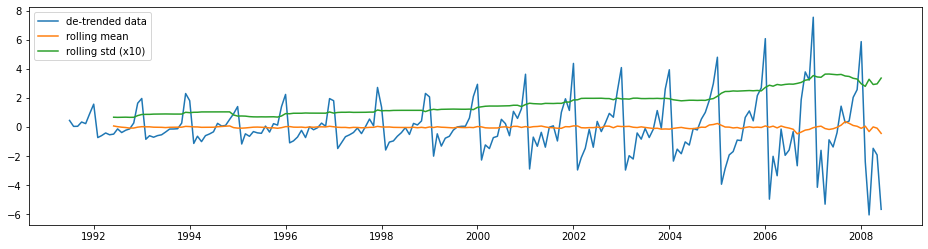

In [ ]:
test_stationarity(detrended1,'de-trended data')
ADF_test(detrended1,'de-trended data')#Este si

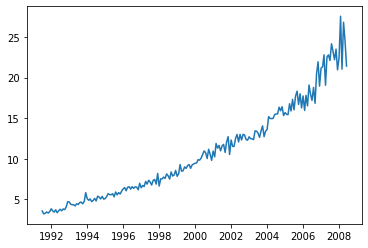

In [ ]:
#Deseazonalized
result_mul = seasonal_decompose(datos2['value'], model='multiplicative', extrapolate_trend='freq')
deseasonalized = datos2['value'] / result_mul.seasonal
plt.plot(deseasonalized)

 > Is the de-trended data stationary ?
Test statistic = 2.876
P-value = 1.000
Critical values :
	1%: -3.4645146202692527 - The data is not stationary with 99% confidence
	5%: -2.8765564361715534 - The data is not stationary with 95% confidence
	10%: -2.5747745328940375 - The data is not stationary with 90% confidence


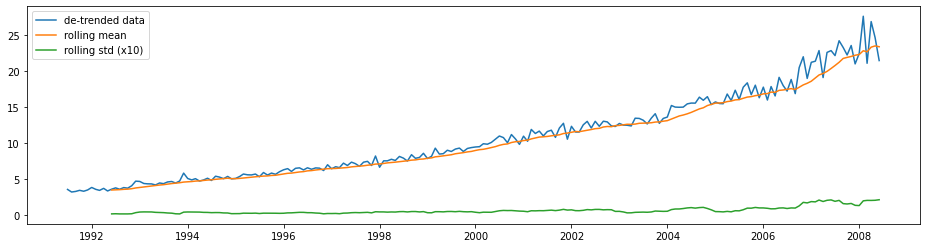

In [ ]:
test_stationarity(deseasonalized,'de-trended data')
ADF_test(deseasonalized,'de-trended data')#Este si

In [ ]:
#Separao en train y test 
y_to_train = datos2[:'2019-05-26']
y_to_val = datos2['2019-06-02':] 
predict_date = len(datos2) - len(datos2[:'2019-06-02']) 

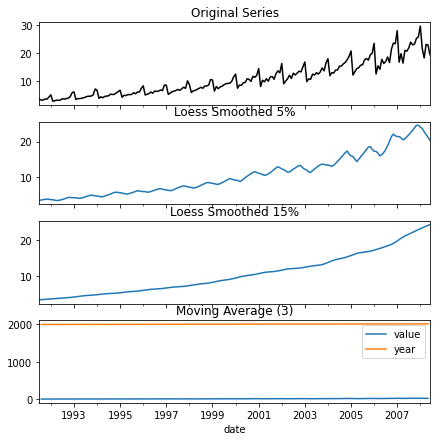

In [ ]:
#Smoothing para probar el smoothing
from statsmodels.nonparametric.smoothers_lowess import lowess
df_ma = datos2.rolling(3, center=True, closed='both').mean()

df_loess_5 = pd.DataFrame(lowess(datos2.value, np.arange(len(datos2.value)), frac=0.05)[:, 1], index=datos2.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(datos2.value, np.arange(len(datos2.value)), frac=0.15)[:, 1], index=datos2.index, columns=['value'])

fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True)
datos2['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
plt.show()

In [ ]:
#Uso varios modelos 
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(datos2, y_to_train,y_to_test,smoothing_level,predict_date ):
    datos2.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level,optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level,round(np.sqrt(mse1), 2)))
    
    ## auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

In [ ]:
#predict_date= len(datos2) - len(datos2[:'2019-06-02'])
#ses(datos2['value'], y_to_train['value'],y_to_val['value'],0.8,predict_date)

## Comienzo el modelado

In [ ]:
#uso otro data 
y_detrend

date
1991-07-01         NaN
1991-08-01         NaN
1991-09-01         NaN
1991-10-01         NaN
1991-11-01         NaN
                ...   
2008-02-01   -0.308451
2008-03-01   -1.229699
2008-04-01   -0.002772
2008-05-01   -0.127903
2008-06-01   -1.263799
Name: value, Length: 204, dtype: float64

In [ ]:
Y1=y_detrend.dropna()
Y1

date
1992-06-01   -0.355578
1992-07-01    0.356041
1992-08-01    0.024212
1992-09-01    0.305459
1992-10-01    0.494374
                ...   
2008-02-01   -0.308451
2008-03-01   -1.229699
2008-04-01   -0.002772
2008-05-01   -0.127903
2008-06-01   -1.263799
Name: value, Length: 193, dtype: float64

In [ ]:
y_to_train = Y1[:'2019-05-26']
y_to_val = Y1['2019-06-02':] 
predict_date = len(Y1) - len(Y1[:'2019-06-02']) 